### SVM(サポートベクトルマシン)

- 「マージン最大化」と呼ばれる考えに基づき、主に2値の分類問題に使われる（多クラス分類、回帰分類への拡張も可能）
- 計算コストが比較的大きいため、大規模なデータセットには適していない。よって、主に中小規模のデータセットで使われる。

In [17]:
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.datasets import load_iris

In [18]:
iris = load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [19]:
# 1と2に分類されるデータを利用

In [20]:
X = iris.data[50:, 2:]
y = iris.target[50:] - 1

In [21]:
X

array([[4.7, 1.4],
       [4.5, 1.5],
       [4.9, 1.5],
       [4. , 1.3],
       [4.6, 1.5],
       [4.5, 1.3],
       [4.7, 1.6],
       [3.3, 1. ],
       [4.6, 1.3],
       [3.9, 1.4],
       [3.5, 1. ],
       [4.2, 1.5],
       [4. , 1. ],
       [4.7, 1.4],
       [3.6, 1.3],
       [4.4, 1.4],
       [4.5, 1.5],
       [4.1, 1. ],
       [4.5, 1.5],
       [3.9, 1.1],
       [4.8, 1.8],
       [4. , 1.3],
       [4.9, 1.5],
       [4.7, 1.2],
       [4.3, 1.3],
       [4.4, 1.4],
       [4.8, 1.4],
       [5. , 1.7],
       [4.5, 1.5],
       [3.5, 1. ],
       [3.8, 1.1],
       [3.7, 1. ],
       [3.9, 1.2],
       [5.1, 1.6],
       [4.5, 1.5],
       [4.5, 1.6],
       [4.7, 1.5],
       [4.4, 1.3],
       [4.1, 1.3],
       [4. , 1.3],
       [4.4, 1.2],
       [4.6, 1.4],
       [4. , 1.2],
       [3.3, 1. ],
       [4.2, 1.3],
       [4.2, 1.2],
       [4.2, 1.3],
       [4.3, 1.3],
       [3. , 1.1],
       [4.1, 1.3],
       [6. , 2.5],
       [5.1, 1.9],
       [5.9,

In [22]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

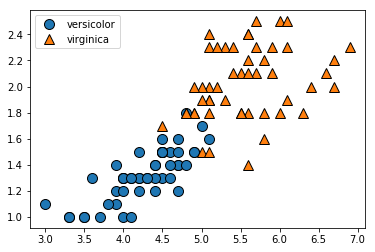

In [23]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.legend(['versicolor', 'virginica'], loc='best')
plt.show()

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

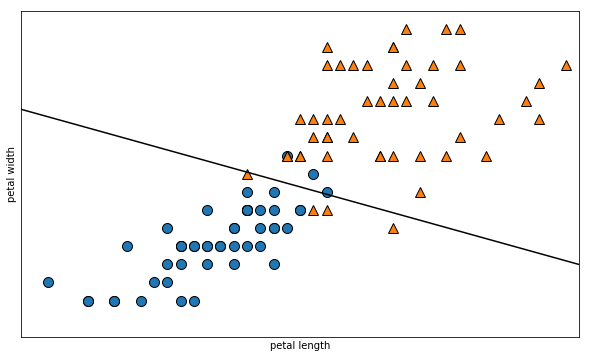

In [25]:
svm = LinearSVC().fit(X_train, y_train)

def plot_sepatator(model):
    plt.figure(figsize=(10,6))
    mglearn.plots.plot_2d_separator(model, X)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
    plt.xlabel('petal length')
    plt.ylabel('petal width')
    plt.xlim(2.8, 7.0)
    plt.ylim(0.8, 2.6)
    plt.show()

plot_sepatator(svm)

/Users/hiraku/anaconda/envs/practice/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


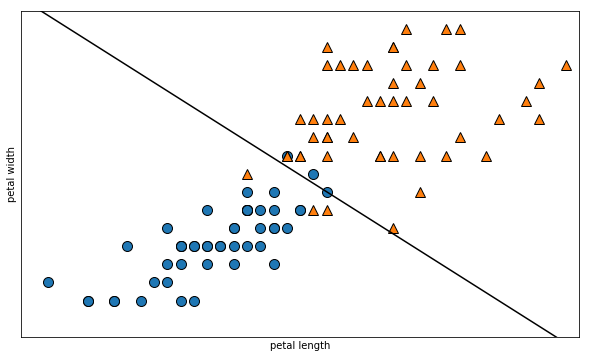

In [26]:
svm_100 = LinearSVC(C=100).fit(X_train, y_train)
plot_sepatator(svm_100)

In [27]:
print('score on training set: {:.2f}'.format(svm.score(X_train, y_train)))
print('score on test set: {:.2f}'.format(svm.score(X_test, y_test)))

score on training set: 0.91
score on test set: 1.00


In [28]:
print('score on training set: {:.2f}'.format(svm_100.score(X_train, y_train)))
print('score on test set: {:.2f}'.format(svm_100.score(X_test, y_test)))

score on training set: 0.93
score on test set: 1.00


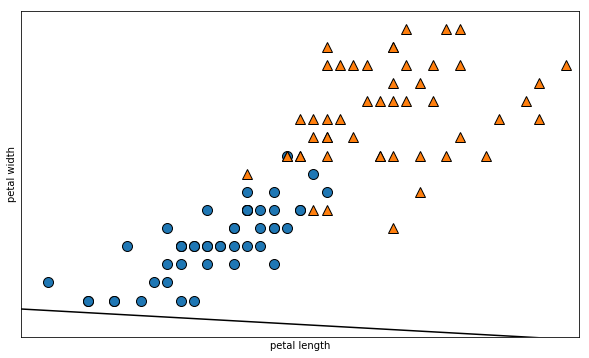

In [29]:
svm_001 = LinearSVC(C=0.01).fit(X_train, y_train)
plot_sepatator(svm_001)

In [30]:
print('score on training set: {:.2f}'.format(svm_001.score(X_train, y_train)))
print('score on test set: {:.2f}'.format(svm_001.score(X_test, y_test)))

score on training set: 0.51
score on test set: 0.48
